In [1]:
import cv2                  
import numpy as np
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import random as rn
import tensorflow as tf

#sklearn modules
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from keras.models import load_model

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2

Using TensorFlow backend.


In [2]:
X=[]
Y=[]
IMG_SIZE=150
FLOWER_DAISY_DIR='flowers/daisy/'
FLOWER_SUNFLOWER_DIR='flowers/sunflower/'
FLOWER_TULIP_DIR='flowers/tulip/'
FLOWER_DANDI_DIR='flowers/dandelion/'
FLOWER_ROSE_DIR='flowers/rose/'

In [3]:
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label = flower_type
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        X.append(np.array(img))
        Y.append(str(label))
        

In [4]:
make_train_data('Daisy',FLOWER_DAISY_DIR)
print(len(X))
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(X))
make_train_data('Dandelion',FLOWER_DANDI_DIR)
print(len(X))
make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(X))
make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))

100%|██████████| 769/769 [00:02<00:00, 275.63it/s]


769


100%|██████████| 734/734 [00:03<00:00, 223.00it/s]


1503


100%|██████████| 1052/1052 [00:04<00:00, 257.09it/s]


2555


100%|██████████| 984/984 [00:03<00:00, 310.14it/s]


3539


100%|██████████| 784/784 [00:02<00:00, 284.45it/s]


4323


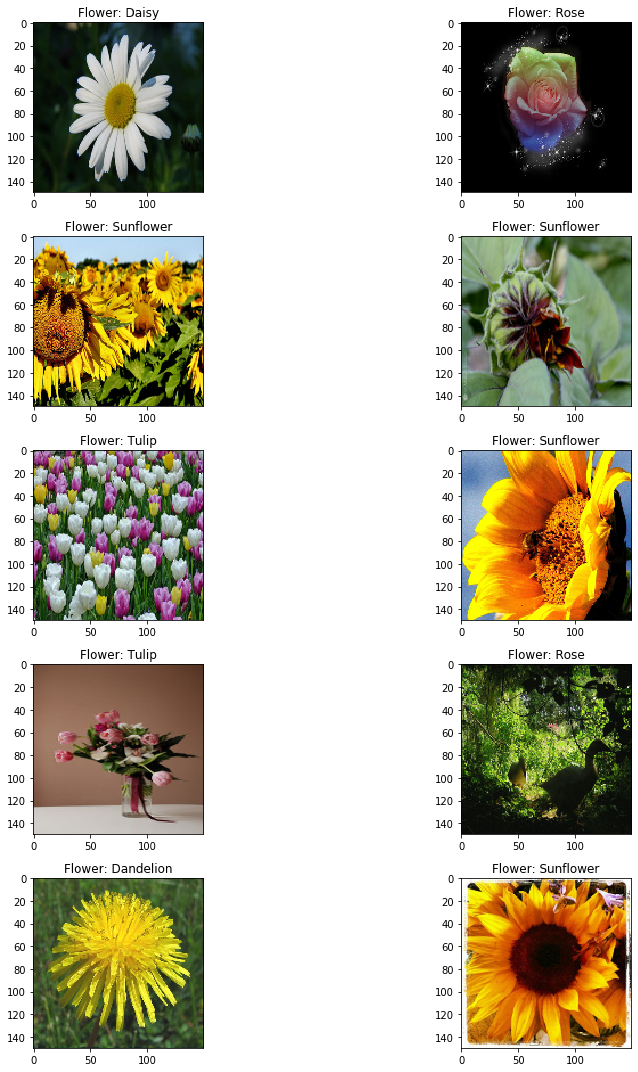

In [5]:
fig,ax = plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l = rn.randint(0,len(Y))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Y[l])
        
plt.tight_layout()

le=LabelEncoder()
Y=le.fit_transform(Y)
Y=to_categorical(Y,5)
X = np.array(X)
X = X/255

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
np.random.seed(42)
rn.seed(42)
tf.set_random_seed(42)

In [6]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', input_shape = (150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3), padding = 'Same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = 'softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
batch_size=64
epochs=50

red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [8]:
#datagen = ImageDataGenerator(
#        featurewise_center=False,  # set input mean to 0 over the dataset
#        samplewise_center=False,  # set each sample mean to 0
#        featurewise_std_normalization=False,  # divide inputs by std of the dataset
#        samplewise_std_normalization=False,  # divide each input by its std
#        zca_whitening=False,  # apply ZCA whitening
#        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
#        zoom_range = 0.1, # Randomly zoom image 
#        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
#        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
#        horizontal_flip=True,  # randomly flip images
#        vertical_flip=False)  # randomly flip images
#
#datagen.fit(x_train)

In [9]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()
#History = model.fit_generator(datagen.flow(x_train,y_train, batch_size = batch_size),
#                              epochs = epochs, validation_data = (x_test,y_test),
#                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)
# model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data = (x_test,y_test))
History = model.fit(x_train, y_train, epochs = epochs, batch_size = 64, verbose=1, validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
activation_1 (Activation)    (None, 150, 150, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 96)        27744     
_________________________________________________________________
activation_2 (Activation)    (None, 75, 75, 96)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 96)        83040     
__________

3458/3458 [==============================] - ETA: 27s - loss: 0.8901 - acc: 0.68 - ETA: 26s - loss: 0.8339 - acc: 0.67 - ETA: 26s - loss: 0.9166 - acc: 0.65 - ETA: 26s - loss: 0.9438 - acc: 0.64 - ETA: 25s - loss: 0.9611 - acc: 0.64 - ETA: 25s - loss: 0.9480 - acc: 0.65 - ETA: 24s - loss: 0.9308 - acc: 0.65 - ETA: 24s - loss: 0.9435 - acc: 0.64 - ETA: 23s - loss: 0.9705 - acc: 0.62 - ETA: 23s - loss: 0.9713 - acc: 0.62 - ETA: 22s - loss: 0.9891 - acc: 0.62 - ETA: 22s - loss: 0.9834 - acc: 0.62 - ETA: 21s - loss: 0.9951 - acc: 0.61 - ETA: 21s - loss: 1.0053 - acc: 0.61 - ETA: 20s - loss: 1.0102 - acc: 0.61 - ETA: 20s - loss: 1.0077 - acc: 0.61 - ETA: 19s - loss: 1.0060 - acc: 0.61 - ETA: 19s - loss: 0.9929 - acc: 0.61 - ETA: 18s - loss: 0.9843 - acc: 0.62 - ETA: 17s - loss: 0.9845 - acc: 0.62 - ETA: 17s - loss: 0.9765 - acc: 0.62 - ETA: 16s - loss: 0.9826 - acc: 0.62 - ETA: 16s - loss: 0.9801 - acc: 0.62 - ETA: 15s - loss: 0.9898 - acc: 0.61 - ETA: 15s - loss: 0.9883 - acc: 0.61 - ETA: 

3458/3458 [==============================] - ETA: 27s - loss: 1.0000 - acc: 0.64 - ETA: 27s - loss: 0.9140 - acc: 0.67 - ETA: 26s - loss: 0.9019 - acc: 0.66 - ETA: 26s - loss: 0.9180 - acc: 0.64 - ETA: 26s - loss: 0.9065 - acc: 0.65 - ETA: 25s - loss: 0.8614 - acc: 0.66 - ETA: 24s - loss: 0.8589 - acc: 0.65 - ETA: 24s - loss: 0.8435 - acc: 0.66 - ETA: 23s - loss: 0.8371 - acc: 0.66 - ETA: 23s - loss: 0.8314 - acc: 0.66 - ETA: 22s - loss: 0.8195 - acc: 0.67 - ETA: 22s - loss: 0.8227 - acc: 0.66 - ETA: 21s - loss: 0.8103 - acc: 0.68 - ETA: 21s - loss: 0.8028 - acc: 0.68 - ETA: 20s - loss: 0.7893 - acc: 0.69 - ETA: 20s - loss: 0.7843 - acc: 0.69 - ETA: 19s - loss: 0.7778 - acc: 0.69 - ETA: 19s - loss: 0.7718 - acc: 0.69 - ETA: 18s - loss: 0.7631 - acc: 0.70 - ETA: 18s - loss: 0.7572 - acc: 0.70 - ETA: 17s - loss: 0.7501 - acc: 0.71 - ETA: 17s - loss: 0.7534 - acc: 0.70 - ETA: 16s - loss: 0.7541 - acc: 0.70 - ETA: 15s - loss: 0.7542 - acc: 0.70 - ETA: 15s - loss: 0.7520 - acc: 0.70 - ETA: 

3458/3458 [==============================] - ETA: 28s - loss: 0.4700 - acc: 0.79 - ETA: 27s - loss: 0.4440 - acc: 0.83 - ETA: 27s - loss: 0.3809 - acc: 0.87 - ETA: 26s - loss: 0.3833 - acc: 0.87 - ETA: 26s - loss: 0.3715 - acc: 0.88 - ETA: 25s - loss: 0.3640 - acc: 0.88 - ETA: 25s - loss: 0.3630 - acc: 0.88 - ETA: 24s - loss: 0.3536 - acc: 0.89 - ETA: 24s - loss: 0.3401 - acc: 0.89 - ETA: 23s - loss: 0.3373 - acc: 0.89 - ETA: 23s - loss: 0.3375 - acc: 0.89 - ETA: 22s - loss: 0.3316 - acc: 0.89 - ETA: 21s - loss: 0.3313 - acc: 0.89 - ETA: 21s - loss: 0.3229 - acc: 0.89 - ETA: 20s - loss: 0.3315 - acc: 0.89 - ETA: 20s - loss: 0.3325 - acc: 0.89 - ETA: 19s - loss: 0.3370 - acc: 0.88 - ETA: 19s - loss: 0.3395 - acc: 0.88 - ETA: 18s - loss: 0.3362 - acc: 0.88 - ETA: 18s - loss: 0.3323 - acc: 0.89 - ETA: 17s - loss: 0.3355 - acc: 0.88 - ETA: 17s - loss: 0.3340 - acc: 0.88 - ETA: 16s - loss: 0.3384 - acc: 0.88 - ETA: 16s - loss: 0.3335 - acc: 0.89 - ETA: 15s - loss: 0.3292 - acc: 0.89 - ETA: 

3458/3458 [==============================] - ETA: 27s - loss: 0.0902 - acc: 0.96 - ETA: 27s - loss: 0.0968 - acc: 0.96 - ETA: 26s - loss: 0.0858 - acc: 0.97 - ETA: 26s - loss: 0.0885 - acc: 0.98 - ETA: 26s - loss: 0.0930 - acc: 0.97 - ETA: 25s - loss: 0.0912 - acc: 0.97 - ETA: 25s - loss: 0.1143 - acc: 0.96 - ETA: 24s - loss: 0.1125 - acc: 0.96 - ETA: 24s - loss: 0.1070 - acc: 0.96 - ETA: 23s - loss: 0.1027 - acc: 0.97 - ETA: 23s - loss: 0.1087 - acc: 0.96 - ETA: 22s - loss: 0.1096 - acc: 0.96 - ETA: 21s - loss: 0.1047 - acc: 0.96 - ETA: 21s - loss: 0.1031 - acc: 0.96 - ETA: 20s - loss: 0.1055 - acc: 0.96 - ETA: 20s - loss: 0.1042 - acc: 0.96 - ETA: 19s - loss: 0.1024 - acc: 0.96 - ETA: 19s - loss: 0.0987 - acc: 0.97 - ETA: 18s - loss: 0.1022 - acc: 0.96 - ETA: 18s - loss: 0.0997 - acc: 0.96 - ETA: 17s - loss: 0.0971 - acc: 0.97 - ETA: 17s - loss: 0.0946 - acc: 0.97 - ETA: 16s - loss: 0.0933 - acc: 0.97 - ETA: 16s - loss: 0.0929 - acc: 0.97 - ETA: 15s - loss: 0.0930 - acc: 0.97 - ETA: 

3458/3458 [==============================] - ETA: 27s - loss: 0.0930 - acc: 0.95 - ETA: 27s - loss: 0.0686 - acc: 0.96 - ETA: 27s - loss: 0.0843 - acc: 0.96 - ETA: 26s - loss: 0.1050 - acc: 0.96 - ETA: 26s - loss: 0.0970 - acc: 0.96 - ETA: 25s - loss: 0.0900 - acc: 0.96 - ETA: 25s - loss: 0.0839 - acc: 0.96 - ETA: 24s - loss: 0.0780 - acc: 0.97 - ETA: 24s - loss: 0.0852 - acc: 0.97 - ETA: 23s - loss: 0.0975 - acc: 0.96 - ETA: 23s - loss: 0.1018 - acc: 0.96 - ETA: 22s - loss: 0.1174 - acc: 0.96 - ETA: 21s - loss: 0.1109 - acc: 0.96 - ETA: 21s - loss: 0.1101 - acc: 0.96 - ETA: 20s - loss: 0.1107 - acc: 0.96 - ETA: 20s - loss: 0.1139 - acc: 0.96 - ETA: 19s - loss: 0.1108 - acc: 0.96 - ETA: 19s - loss: 0.1066 - acc: 0.96 - ETA: 18s - loss: 0.1052 - acc: 0.96 - ETA: 18s - loss: 0.1027 - acc: 0.96 - ETA: 17s - loss: 0.1010 - acc: 0.96 - ETA: 17s - loss: 0.0987 - acc: 0.96 - ETA: 16s - loss: 0.0961 - acc: 0.97 - ETA: 16s - loss: 0.0945 - acc: 0.97 - ETA: 15s - loss: 0.0934 - acc: 0.97 - ETA: 

3458/3458 [==============================] - ETA: 28s - loss: 0.0042 - acc: 1.00 - ETA: 27s - loss: 0.0035 - acc: 1.00 - ETA: 27s - loss: 0.0047 - acc: 1.00 - ETA: 26s - loss: 0.0056 - acc: 1.00 - ETA: 26s - loss: 0.0051 - acc: 1.00 - ETA: 25s - loss: 0.0048 - acc: 1.00 - ETA: 25s - loss: 0.0286 - acc: 0.99 - ETA: 24s - loss: 0.0253 - acc: 0.99 - ETA: 24s - loss: 0.0233 - acc: 0.99 - ETA: 23s - loss: 0.0267 - acc: 0.99 - ETA: 23s - loss: 0.0249 - acc: 0.99 - ETA: 22s - loss: 0.0331 - acc: 0.99 - ETA: 22s - loss: 0.0312 - acc: 0.99 - ETA: 21s - loss: 0.0291 - acc: 0.99 - ETA: 20s - loss: 0.0275 - acc: 0.99 - ETA: 20s - loss: 0.0259 - acc: 0.99 - ETA: 19s - loss: 0.0245 - acc: 0.99 - ETA: 19s - loss: 0.0234 - acc: 0.99 - ETA: 18s - loss: 0.0222 - acc: 0.99 - ETA: 18s - loss: 0.0225 - acc: 0.99 - ETA: 17s - loss: 0.0217 - acc: 0.99 - ETA: 17s - loss: 0.0209 - acc: 0.99 - ETA: 16s - loss: 0.0201 - acc: 0.99 - ETA: 16s - loss: 0.0194 - acc: 0.99 - ETA: 15s - loss: 0.0187 - acc: 0.99 - ETA: 

3458/3458 [==============================] - ETA: 27s - loss: 0.0021 - acc: 1.00 - ETA: 27s - loss: 0.0101 - acc: 0.99 - ETA: 26s - loss: 0.0072 - acc: 0.99 - ETA: 26s - loss: 0.0061 - acc: 0.99 - ETA: 26s - loss: 0.0057 - acc: 0.99 - ETA: 25s - loss: 0.0049 - acc: 0.99 - ETA: 24s - loss: 0.0043 - acc: 0.99 - ETA: 24s - loss: 0.0039 - acc: 0.99 - ETA: 24s - loss: 0.0037 - acc: 0.99 - ETA: 23s - loss: 0.0034 - acc: 0.99 - ETA: 23s - loss: 0.0035 - acc: 0.99 - ETA: 22s - loss: 0.0033 - acc: 0.99 - ETA: 22s - loss: 0.0040 - acc: 0.99 - ETA: 21s - loss: 0.0038 - acc: 0.99 - ETA: 20s - loss: 0.0041 - acc: 0.99 - ETA: 20s - loss: 0.0039 - acc: 0.99 - ETA: 19s - loss: 0.0037 - acc: 0.99 - ETA: 19s - loss: 0.0036 - acc: 0.99 - ETA: 18s - loss: 0.0132 - acc: 0.99 - ETA: 18s - loss: 0.0126 - acc: 0.99 - ETA: 17s - loss: 0.0121 - acc: 0.99 - ETA: 17s - loss: 0.0117 - acc: 0.99 - ETA: 16s - loss: 0.0112 - acc: 0.99 - ETA: 16s - loss: 0.0108 - acc: 0.99 - ETA: 15s - loss: 0.0105 - acc: 0.99 - ETA: 

3458/3458 [==============================] - ETA: 27s - loss: 3.6463e-04 - acc: 1.00 - ETA: 27s - loss: 8.4451e-04 - acc: 1.00 - ETA: 27s - loss: 8.5996e-04 - acc: 1.00 - ETA: 26s - loss: 9.0284e-04 - acc: 1.00 - ETA: 26s - loss: 7.8522e-04 - acc: 1.00 - ETA: 25s - loss: 8.0544e-04 - acc: 1.00 - ETA: 24s - loss: 8.3455e-04 - acc: 1.00 - ETA: 24s - loss: 7.9076e-04 - acc: 1.00 - ETA: 24s - loss: 9.1284e-04 - acc: 1.00 - ETA: 23s - loss: 9.7048e-04 - acc: 1.00 - ETA: 23s - loss: 9.3588e-04 - acc: 1.00 - ETA: 22s - loss: 8.9217e-04 - acc: 1.00 - ETA: 21s - loss: 8.9774e-04 - acc: 1.00 - ETA: 21s - loss: 8.6548e-04 - acc: 1.00 - ETA: 20s - loss: 8.5277e-04 - acc: 1.00 - ETA: 20s - loss: 8.2282e-04 - acc: 1.00 - ETA: 19s - loss: 0.0031 - acc: 0.9991   - ETA: 19s - loss: 0.0030 - acc: 0.99 - ETA: 18s - loss: 0.0029 - acc: 0.99 - ETA: 18s - loss: 0.0086 - acc: 0.99 - ETA: 17s - loss: 0.0083 - acc: 0.99 - ETA: 17s - loss: 0.0080 - acc: 0.99 - ETA: 16s - loss: 0.0077 - acc: 0.99 - ETA: 16s - lo

3458/3458 [==============================] - ETA: 28s - loss: 6.3637e-04 - acc: 1.00 - ETA: 28s - loss: 6.4097e-04 - acc: 1.00 - ETA: 27s - loss: 6.8950e-04 - acc: 1.00 - ETA: 27s - loss: 8.4203e-04 - acc: 1.00 - ETA: 26s - loss: 7.7771e-04 - acc: 1.00 - ETA: 25s - loss: 0.0116 - acc: 0.9974   - ETA: 25s - loss: 0.0100 - acc: 0.99 - ETA: 24s - loss: 0.0090 - acc: 0.99 - ETA: 24s - loss: 0.0080 - acc: 0.99 - ETA: 23s - loss: 0.0073 - acc: 0.99 - ETA: 23s - loss: 0.0124 - acc: 0.99 - ETA: 22s - loss: 0.0114 - acc: 0.99 - ETA: 22s - loss: 0.0106 - acc: 0.99 - ETA: 21s - loss: 0.0099 - acc: 0.99 - ETA: 20s - loss: 0.0093 - acc: 0.99 - ETA: 20s - loss: 0.0087 - acc: 0.99 - ETA: 19s - loss: 0.0083 - acc: 0.99 - ETA: 19s - loss: 0.0078 - acc: 0.99 - ETA: 18s - loss: 0.0075 - acc: 0.99 - ETA: 18s - loss: 0.0071 - acc: 0.99 - ETA: 17s - loss: 0.0068 - acc: 0.99 - ETA: 17s - loss: 0.0065 - acc: 0.99 - ETA: 16s - loss: 0.0063 - acc: 0.99 - ETA: 16s - loss: 0.0060 - acc: 0.99 - ETA: 15s - loss: 0.

3458/3458 [==============================] - ETA: 27s - loss: 7.9353e-04 - acc: 1.00 - ETA: 27s - loss: 7.1170e-04 - acc: 1.00 - ETA: 27s - loss: 0.0012 - acc: 1.0000   - ETA: 26s - loss: 0.0011 - acc: 1.00 - ETA: 26s - loss: 0.0011 - acc: 1.00 - ETA: 25s - loss: 9.9782e-04 - acc: 1.00 - ETA: 24s - loss: 9.8293e-04 - acc: 1.00 - ETA: 24s - loss: 0.0010 - acc: 1.0000   - ETA: 24s - loss: 0.0010 - acc: 1.00 - ETA: 23s - loss: 9.3817e-04 - acc: 1.00 - ETA: 22s - loss: 8.9627e-04 - acc: 1.00 - ETA: 22s - loss: 8.3679e-04 - acc: 1.00 - ETA: 21s - loss: 8.1466e-04 - acc: 1.00 - ETA: 21s - loss: 8.1326e-04 - acc: 1.00 - ETA: 20s - loss: 7.8566e-04 - acc: 1.00 - ETA: 20s - loss: 7.6307e-04 - acc: 1.00 - ETA: 19s - loss: 7.4937e-04 - acc: 1.00 - ETA: 19s - loss: 7.5827e-04 - acc: 1.00 - ETA: 18s - loss: 7.3610e-04 - acc: 1.00 - ETA: 18s - loss: 7.3255e-04 - acc: 1.00 - ETA: 17s - loss: 7.2050e-04 - acc: 1.00 - ETA: 17s - loss: 7.0279e-04 - acc: 1.00 - ETA: 16s - loss: 6.9138e-04 - acc: 1.00 - E

3458/3458 [==============================] - ETA: 27s - loss: 1.5939e-04 - acc: 1.00 - ETA: 27s - loss: 2.0820e-04 - acc: 1.00 - ETA: 26s - loss: 2.3572e-04 - acc: 1.00 - ETA: 26s - loss: 3.0213e-04 - acc: 1.00 - ETA: 26s - loss: 0.0041 - acc: 0.9969   - ETA: 25s - loss: 0.0035 - acc: 0.99 - ETA: 25s - loss: 0.0030 - acc: 0.99 - ETA: 24s - loss: 0.0027 - acc: 0.99 - ETA: 23s - loss: 0.0024 - acc: 0.99 - ETA: 23s - loss: 0.0022 - acc: 0.99 - ETA: 23s - loss: 0.0021 - acc: 0.99 - ETA: 22s - loss: 0.0019 - acc: 0.99 - ETA: 21s - loss: 0.0018 - acc: 0.99 - ETA: 21s - loss: 0.0017 - acc: 0.99 - ETA: 20s - loss: 0.0016 - acc: 0.99 - ETA: 20s - loss: 0.0016 - acc: 0.99 - ETA: 19s - loss: 0.0015 - acc: 0.99 - ETA: 19s - loss: 0.0015 - acc: 0.99 - ETA: 18s - loss: 0.0014 - acc: 0.99 - ETA: 18s - loss: 0.0013 - acc: 0.99 - ETA: 17s - loss: 0.0013 - acc: 0.99 - ETA: 17s - loss: 0.0013 - acc: 0.99 - ETA: 16s - loss: 0.0012 - acc: 0.99 - ETA: 16s - loss: 0.0012 - acc: 0.99 - ETA: 15s - loss: 0.0033

3458/3458 [==============================] - ETA: 27s - loss: 7.2038e-04 - acc: 1.00 - ETA: 27s - loss: 4.1957e-04 - acc: 1.00 - ETA: 27s - loss: 4.2281e-04 - acc: 1.00 - ETA: 26s - loss: 3.7435e-04 - acc: 1.00 - ETA: 26s - loss: 0.0016 - acc: 1.0000   - ETA: 25s - loss: 0.0014 - acc: 1.00 - ETA: 25s - loss: 0.0012 - acc: 1.00 - ETA: 24s - loss: 0.0011 - acc: 1.00 - ETA: 24s - loss: 0.0011 - acc: 1.00 - ETA: 23s - loss: 0.0011 - acc: 1.00 - ETA: 23s - loss: 9.8267e-04 - acc: 1.00 - ETA: 22s - loss: 9.3958e-04 - acc: 1.00 - ETA: 22s - loss: 8.9007e-04 - acc: 1.00 - ETA: 21s - loss: 8.5944e-04 - acc: 1.00 - ETA: 21s - loss: 8.1169e-04 - acc: 1.00 - ETA: 20s - loss: 7.7106e-04 - acc: 1.00 - ETA: 19s - loss: 7.4284e-04 - acc: 1.00 - ETA: 19s - loss: 7.1033e-04 - acc: 1.00 - ETA: 18s - loss: 7.1478e-04 - acc: 1.00 - ETA: 18s - loss: 7.0170e-04 - acc: 1.00 - ETA: 17s - loss: 6.7524e-04 - acc: 1.00 - ETA: 17s - loss: 6.5888e-04 - acc: 1.00 - ETA: 16s - loss: 6.3646e-04 - acc: 1.00 - ETA: 16s 

3458/3458 [==============================] - ETA: 28s - loss: 0.0209 - acc: 0.98 - ETA: 27s - loss: 0.0105 - acc: 0.99 - ETA: 27s - loss: 0.0072 - acc: 0.99 - ETA: 26s - loss: 0.0055 - acc: 0.99 - ETA: 26s - loss: 0.0044 - acc: 0.99 - ETA: 25s - loss: 0.0037 - acc: 0.99 - ETA: 25s - loss: 0.0050 - acc: 0.99 - ETA: 24s - loss: 0.0044 - acc: 0.99 - ETA: 24s - loss: 0.0039 - acc: 0.99 - ETA: 23s - loss: 0.0035 - acc: 0.99 - ETA: 23s - loss: 0.0032 - acc: 0.99 - ETA: 22s - loss: 0.0030 - acc: 0.99 - ETA: 22s - loss: 0.0028 - acc: 0.99 - ETA: 21s - loss: 0.0026 - acc: 0.99 - ETA: 20s - loss: 0.0025 - acc: 0.99 - ETA: 20s - loss: 0.0024 - acc: 0.99 - ETA: 19s - loss: 0.0032 - acc: 0.99 - ETA: 19s - loss: 0.0030 - acc: 0.99 - ETA: 18s - loss: 0.0046 - acc: 0.99 - ETA: 18s - loss: 0.0043 - acc: 0.99 - ETA: 17s - loss: 0.0042 - acc: 0.99 - ETA: 17s - loss: 0.0040 - acc: 0.99 - ETA: 16s - loss: 0.0038 - acc: 0.99 - ETA: 16s - loss: 0.0037 - acc: 0.99 - ETA: 15s - loss: 0.0035 - acc: 0.99 - ETA: 

3458/3458 [==============================] - ETA: 27s - loss: 2.1654e-04 - acc: 1.00 - ETA: 27s - loss: 3.1852e-04 - acc: 1.00 - ETA: 27s - loss: 2.8146e-04 - acc: 1.00 - ETA: 26s - loss: 3.1505e-04 - acc: 1.00 - ETA: 26s - loss: 3.1641e-04 - acc: 1.00 - ETA: 25s - loss: 3.5550e-04 - acc: 1.00 - ETA: 25s - loss: 3.6663e-04 - acc: 1.00 - ETA: 24s - loss: 3.7029e-04 - acc: 1.00 - ETA: 24s - loss: 3.7377e-04 - acc: 1.00 - ETA: 23s - loss: 3.6716e-04 - acc: 1.00 - ETA: 23s - loss: 3.6413e-04 - acc: 1.00 - ETA: 22s - loss: 3.5573e-04 - acc: 1.00 - ETA: 22s - loss: 3.7126e-04 - acc: 1.00 - ETA: 21s - loss: 3.6924e-04 - acc: 1.00 - ETA: 21s - loss: 3.5630e-04 - acc: 1.00 - ETA: 20s - loss: 0.0016 - acc: 0.9990   - ETA: 19s - loss: 0.0015 - acc: 0.99 - ETA: 19s - loss: 0.0014 - acc: 0.99 - ETA: 18s - loss: 0.0014 - acc: 0.99 - ETA: 18s - loss: 0.0013 - acc: 0.99 - ETA: 17s - loss: 0.0013 - acc: 0.99 - ETA: 17s - loss: 0.0012 - acc: 0.99 - ETA: 16s - loss: 0.0012 - acc: 0.99 - ETA: 16s - loss: 

3458/3458 [==============================] - ETA: 27s - loss: 1.7292e-04 - acc: 1.00 - ETA: 27s - loss: 1.3912e-04 - acc: 1.00 - ETA: 27s - loss: 1.4425e-04 - acc: 1.00 - ETA: 26s - loss: 1.6720e-04 - acc: 1.00 - ETA: 26s - loss: 1.8087e-04 - acc: 1.00 - ETA: 25s - loss: 1.8780e-04 - acc: 1.00 - ETA: 25s - loss: 1.7643e-04 - acc: 1.00 - ETA: 24s - loss: 1.8501e-04 - acc: 1.00 - ETA: 24s - loss: 0.0018 - acc: 0.9983   - ETA: 23s - loss: 0.0017 - acc: 0.99 - ETA: 23s - loss: 0.0015 - acc: 0.99 - ETA: 22s - loss: 0.0029 - acc: 0.99 - ETA: 22s - loss: 0.0027 - acc: 0.99 - ETA: 21s - loss: 0.0025 - acc: 0.99 - ETA: 21s - loss: 0.0024 - acc: 0.99 - ETA: 20s - loss: 0.0022 - acc: 0.99 - ETA: 19s - loss: 0.0021 - acc: 0.99 - ETA: 19s - loss: 0.0020 - acc: 0.99 - ETA: 18s - loss: 0.0026 - acc: 0.99 - ETA: 18s - loss: 0.0024 - acc: 0.99 - ETA: 17s - loss: 0.0023 - acc: 0.99 - ETA: 17s - loss: 0.0022 - acc: 0.99 - ETA: 16s - loss: 0.0021 - acc: 0.99 - ETA: 16s - loss: 0.0021 - acc: 0.99 - ETA: 15

3458/3458 [==============================] - ETA: 28s - loss: 0.0082 - acc: 1.00 - ETA: 27s - loss: 0.0042 - acc: 1.00 - ETA: 27s - loss: 0.0029 - acc: 1.00 - ETA: 26s - loss: 0.0023 - acc: 1.00 - ETA: 26s - loss: 0.0019 - acc: 1.00 - ETA: 25s - loss: 0.0017 - acc: 1.00 - ETA: 25s - loss: 0.0015 - acc: 1.00 - ETA: 24s - loss: 0.0014 - acc: 1.00 - ETA: 24s - loss: 0.0012 - acc: 1.00 - ETA: 23s - loss: 0.0011 - acc: 1.00 - ETA: 23s - loss: 0.0011 - acc: 1.00 - ETA: 22s - loss: 0.0010 - acc: 1.00 - ETA: 22s - loss: 0.0021 - acc: 0.99 - ETA: 21s - loss: 0.0020 - acc: 0.99 - ETA: 21s - loss: 0.0018 - acc: 0.99 - ETA: 20s - loss: 0.0018 - acc: 0.99 - ETA: 19s - loss: 0.0017 - acc: 0.99 - ETA: 19s - loss: 0.0016 - acc: 0.99 - ETA: 18s - loss: 0.0015 - acc: 0.99 - ETA: 18s - loss: 0.0015 - acc: 0.99 - ETA: 17s - loss: 0.0014 - acc: 0.99 - ETA: 17s - loss: 0.0014 - acc: 0.99 - ETA: 16s - loss: 0.0013 - acc: 0.99 - ETA: 16s - loss: 0.0013 - acc: 0.99 - ETA: 15s - loss: 0.0019 - acc: 0.99 - ETA: 

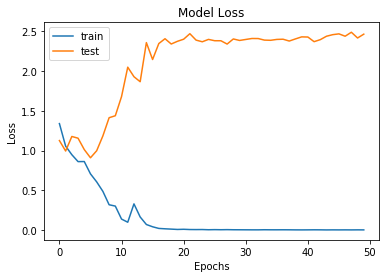

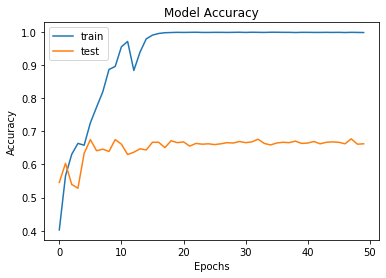

In [10]:
model.save('flowers_BN_0530_Test.h5')

plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [11]:
# getting predictions on val set.
import warnings
#model = load_model('./flowers_BN.h5')
pred = model.predict(x_test)
pred_digits = np.argmax(pred,axis=1)

# now storing some properly as well as misclassified indexes'.
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

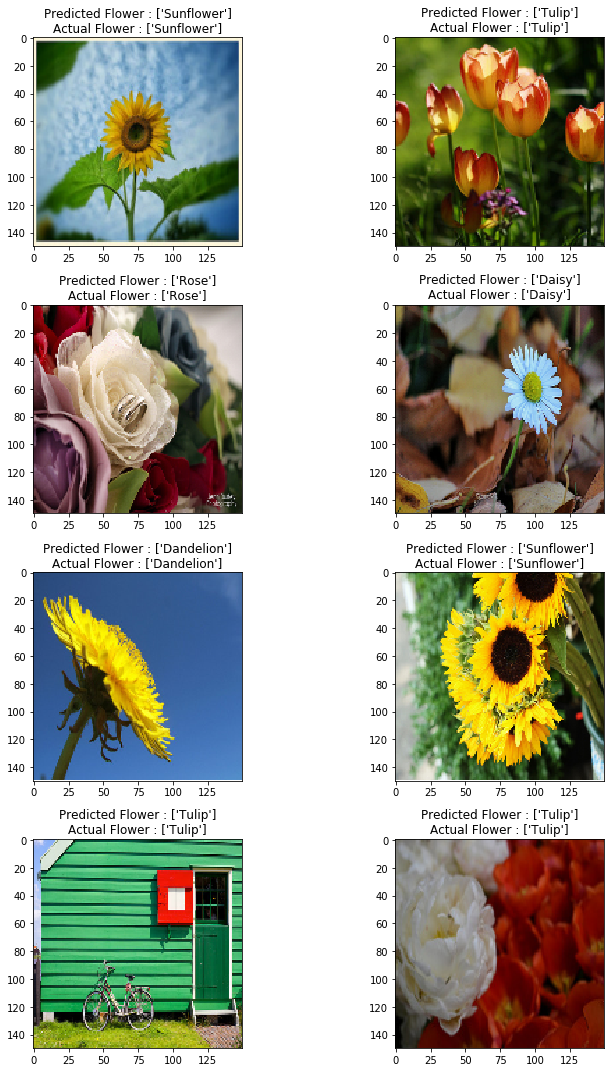

In [12]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted Flower : "+str(le.inverse_transform([pred_digits[prop_class[count]]]))+"\n"+"Actual Flower : "+str(le.inverse_transform([np.argmax([y_test[prop_class[count]]])])))
        plt.tight_layout()
        count+=1

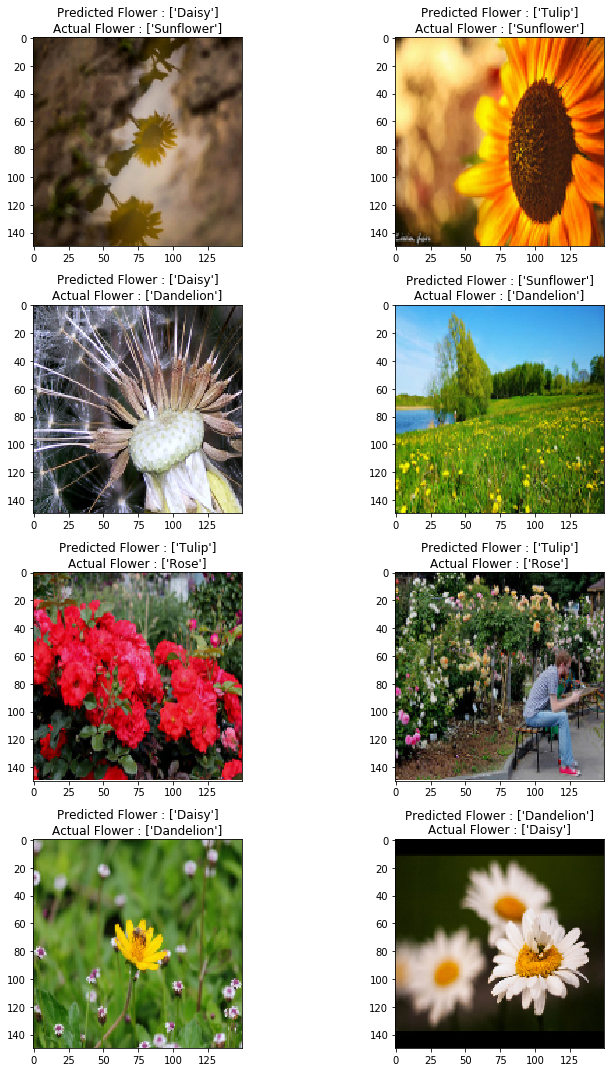

In [13]:
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[mis_class[count]])
        ax[i,j].set_title("Predicted Flower : "+str(le.inverse_transform([pred_digits[mis_class[count]]]))+"\n"+"Actual Flower : "+str(le.inverse_transform([np.argmax([y_test[mis_class[count]]])])))
        plt.tight_layout()
        count+=1